# Sprint 04
## Group 05
***

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, Pool

In [172]:
data = pd.read_excel('/Users/aagnaykariyal/Documents/Github/Semester 02/AI for Business Dev/Sprint 04/Design Day Week 9 AI for Business.xlsx')
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Exploratory Data Analysis
***

In [173]:
print(data.columns)

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [174]:
print(f"Unique Churn values: {data['Churn'].unique()}")
print(f"Unique Complain values: {data['Complain'].unique()}")
print(f"Unique order counts: {data['OrderCount'].unique()}")

Unique Churn values: [1 0]
Unique Complain values: [1 0]
Unique order counts: [ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]


In [175]:
print(data['Churn'].value_counts())

Churn
0    4682
1     948
Name: count, dtype: int64


## Data Visualizations

### Cashback Amount

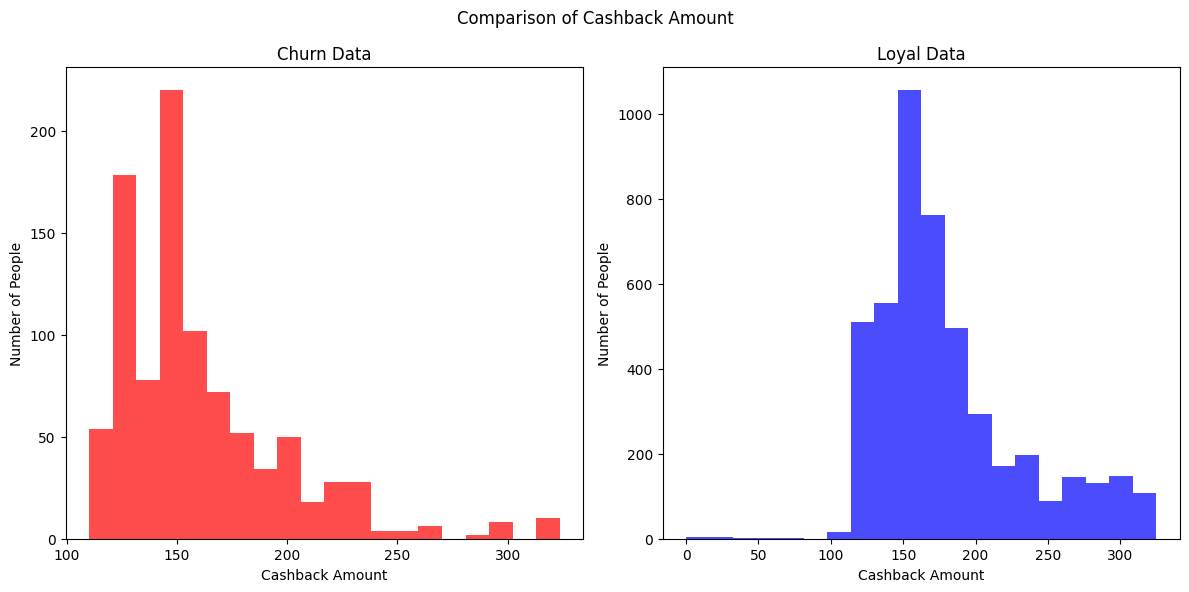

In [176]:
churn_cashback = data.loc[data['Churn'] == 1, ['CashbackAmount']]
loyal_cashback = data.loc[data['Churn'] == 0, ['CashbackAmount']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_cashback, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Number of People')
ax1.set_xlabel('Cashback Amount')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_cashback, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Number of People')
ax2.set_xlabel('Cashback Amount')

# Add labels and title
fig.suptitle('Comparison of Cashback Amount')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

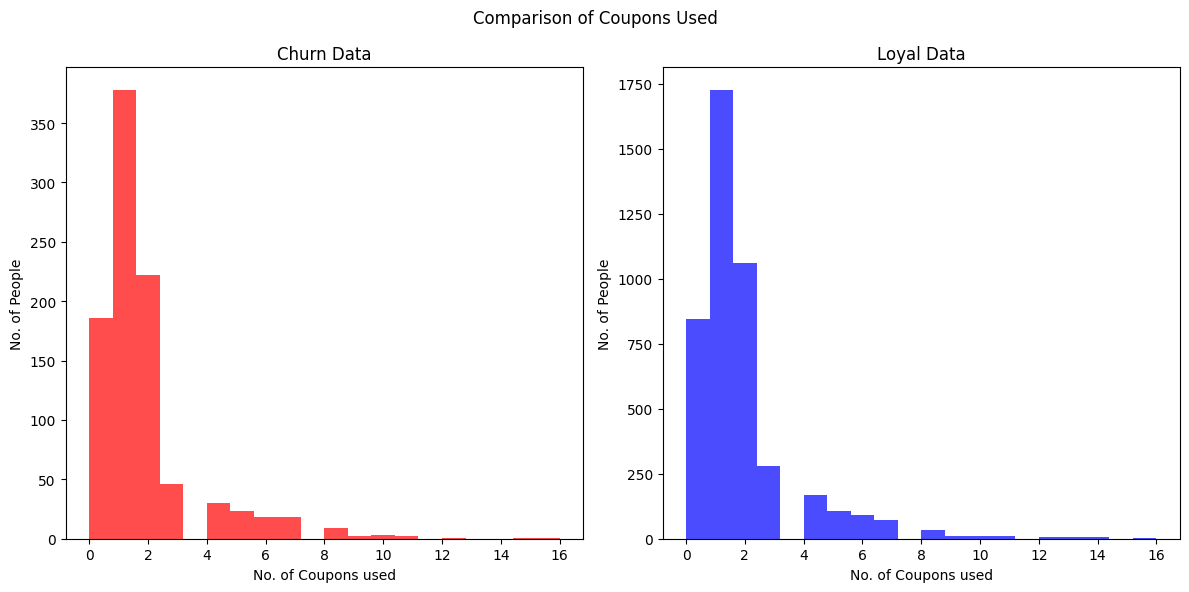

In [177]:
churn_cashback = data.loc[data['Churn'] == 1, ['CouponUsed']]
loyal_cashback = data.loc[data['Churn'] == 0, ['CouponUsed']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_cashback, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('No. of People')
ax1.set_xlabel('No. of Coupons used')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_cashback, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('No. of People')
ax2.set_xlabel('No. of Coupons used')

# Add labels and title
fig.suptitle('Comparison of Coupons Used')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

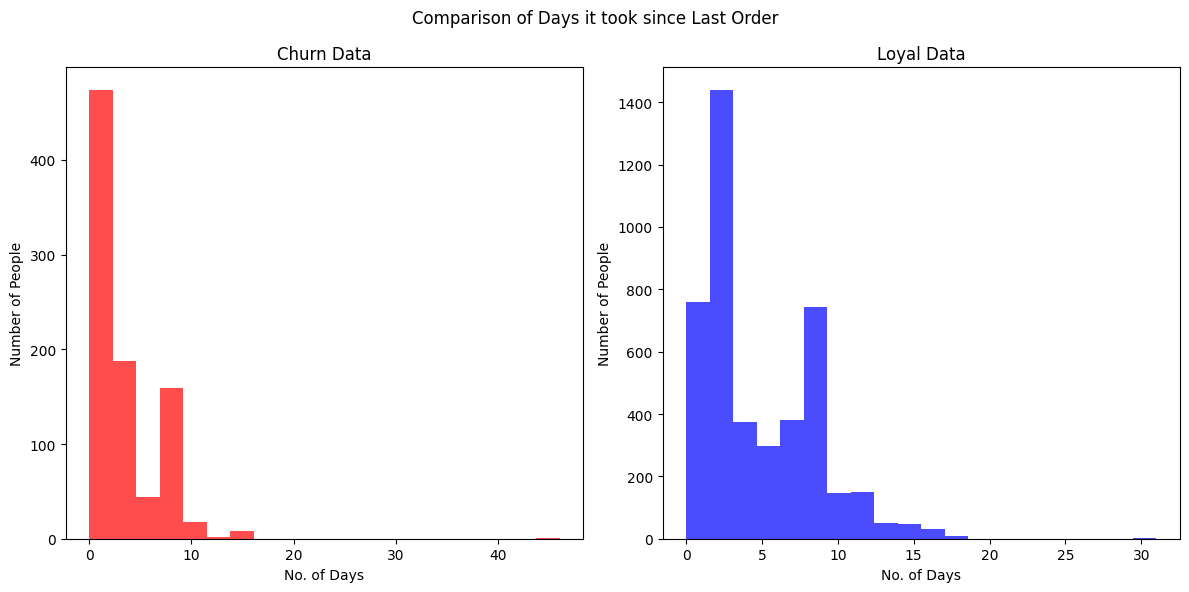

In [178]:
churn_cashback = data.loc[data['Churn'] == 1, ['DaySinceLastOrder']]
loyal_cashback = data.loc[data['Churn'] == 0, ['DaySinceLastOrder']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_cashback, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Number of People')
ax1.set_xlabel('No. of Days')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_cashback, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Number of People')
ax2.set_xlabel('No. of Days')

# Add labels and title
fig.suptitle('Comparison of Days it took since Last Order')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Hours Spent on App

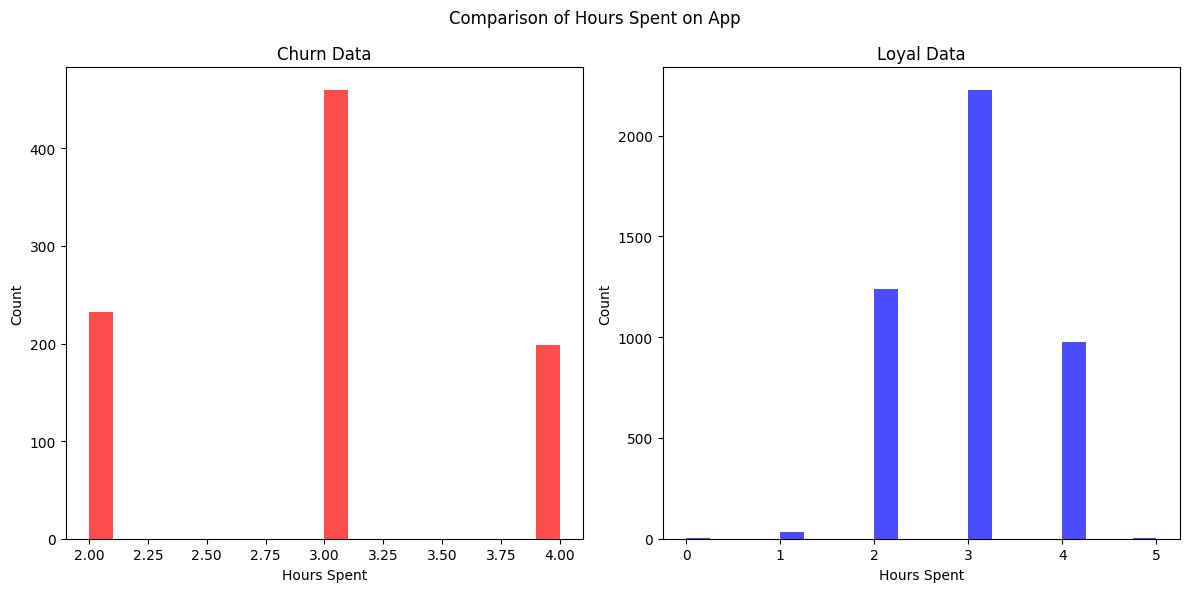

In [179]:
churn_hours_spent = data.loc[data['Churn'] == 1, ['HourSpendOnApp']]
loyal_hours_spent = data.loc[data['Churn'] == 0, ['HourSpendOnApp']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_hours_spent, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Count')
ax1.set_xlabel('Hours Spent')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_hours_spent, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Count')
ax2.set_xlabel('Hours Spent')

# Add labels and title
fig.suptitle('Comparison of Hours Spent on App')


# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Satisfaction Score

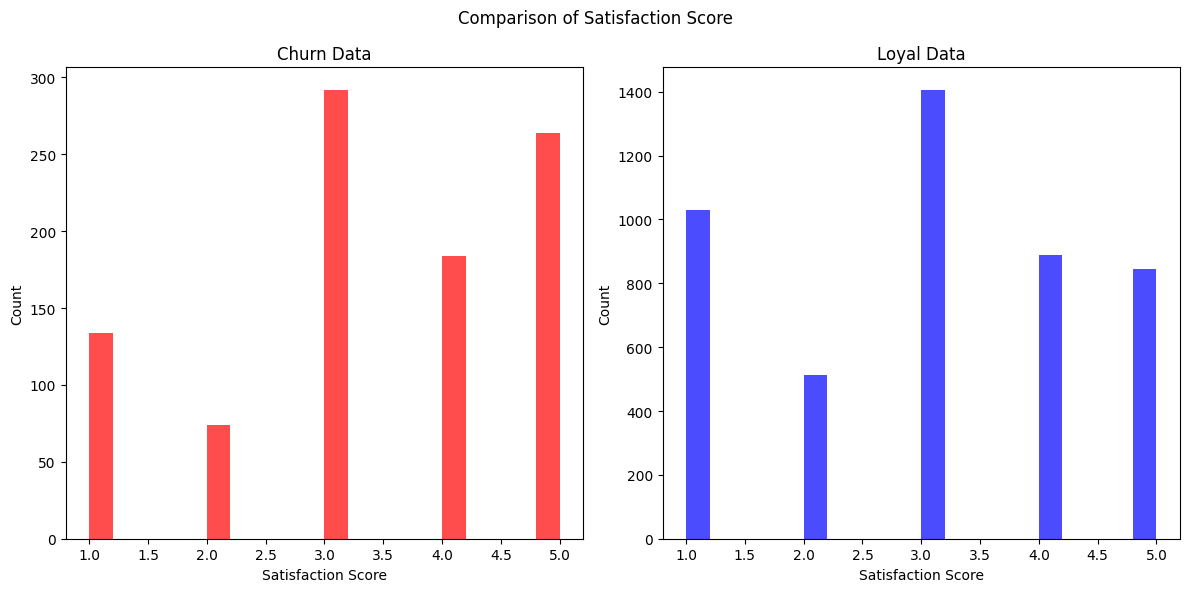

In [180]:
churn_sat_score = data.loc[data['Churn'] == 1, ['SatisfactionScore']]
loyal_sat_score = data.loc[data['Churn'] == 0, ['SatisfactionScore']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_sat_score, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Count')
ax1.set_xlabel('Satisfaction Score')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_sat_score, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Count')
ax2.set_xlabel('Satisfaction Score')

# Add labels and title
fig.suptitle('Comparison of Satisfaction Score')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

From the above graph we can see that the number of people who are more possible to leave the most are who rate 3 in the satisfaction score. Surprisingly, the second highest chances of people leaving are people who rate 5 in satisfaction. This could indicate that people who once thought the platform was good might have been changing their minds based on the changes in service that is being provided by the company.

### Order Counts

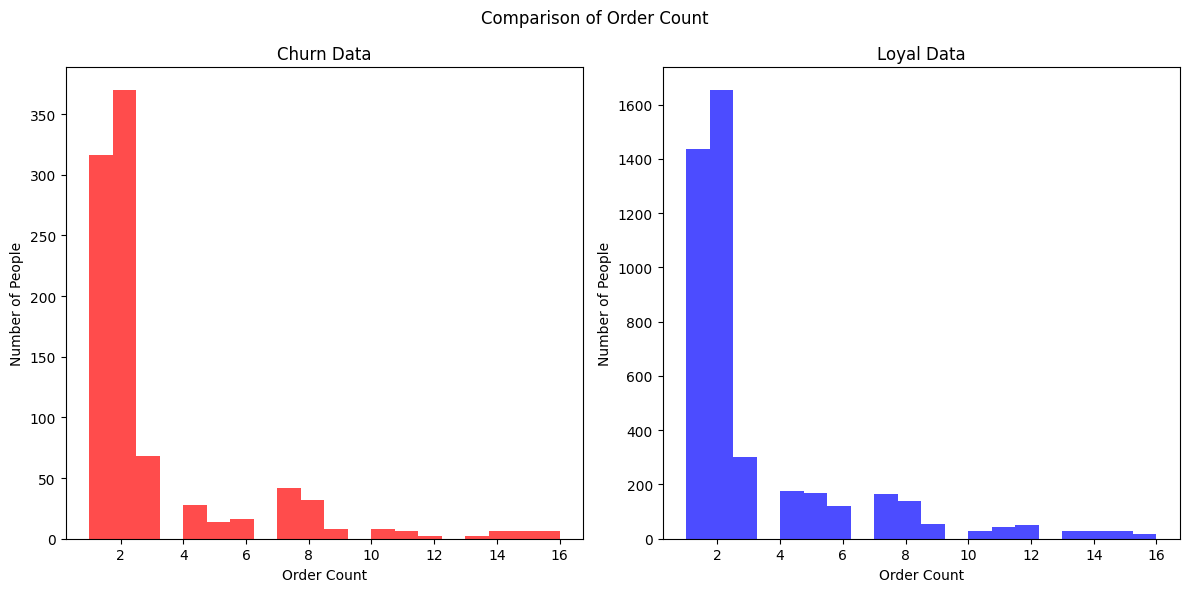

In [181]:
churn_order_count = data.loc[data['Churn'] == 1, ['OrderCount']]
loyal_order_count = data.loc[data['Churn'] == 0, ['OrderCount']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_order_count, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Number of People')
ax1.set_xlabel('Order Count')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_order_count, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Number of People')
ax2.set_xlabel('Order Count')

# Add labels and title
fig.suptitle('Comparison of Order Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Number of Complaints

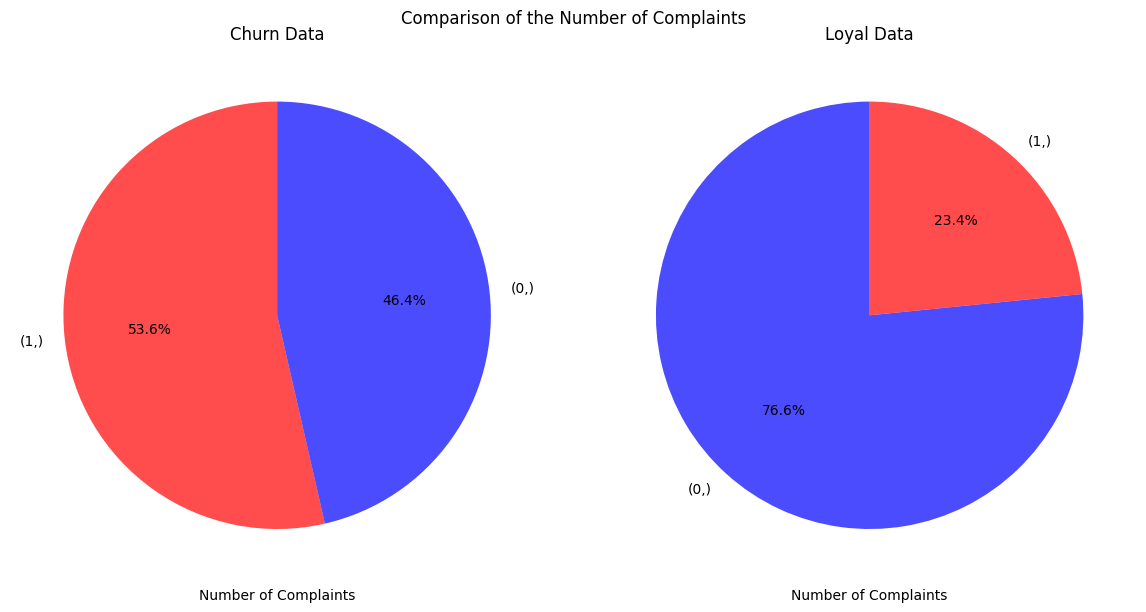

In [182]:
churn_cashback = data.loc[data['Churn'] == 1, ['Complain']].value_counts()
loyal_cashback = data.loc[data['Churn'] == 0, ['Complain']].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.pie(churn_cashback, labels=churn_cashback.index, colors=['red', 'blue'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax1.set_title('Churn Data')
ax1.set_xlabel('Number of Complaints')

# Plot the second histogram on the second subplot (ax2)
ax2.pie(loyal_cashback, labels=loyal_cashback.index, colors=['blue', 'red'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax2.set_title('Loyal Data')
ax2.set_xlabel('Number of Complaints')

# Add labels and title
fig.suptitle('Comparison of the Number of Complaints')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

From the above data, we can see that the ratio of people who complain about the products are way more, more than 50% in Churn data. This indicates that possibly addressing the concerns of the users might increase the chances of Users being more loyal to the platform

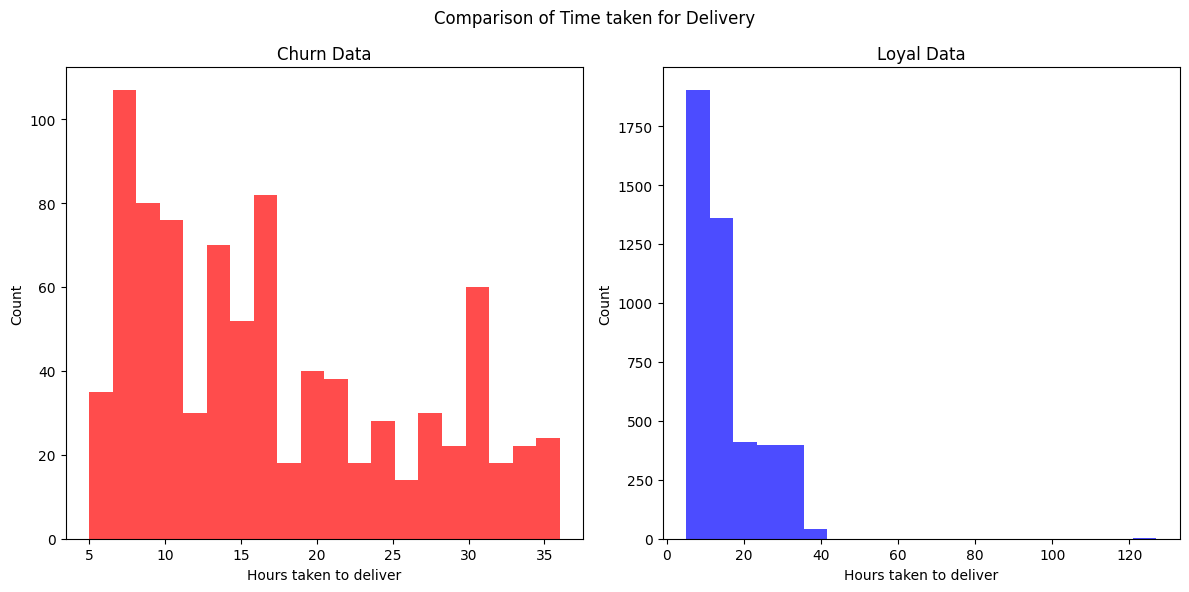

In [183]:
churn_order_count = data.loc[data['Churn'] == 1, ['WarehouseToHome']]
loyal_order_count = data.loc[data['Churn'] == 0, ['WarehouseToHome']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.hist(churn_order_count, bins=20, color='red', alpha=0.7)
ax1.set_title('Churn Data')
ax1.set_ylabel('Count')
ax1.set_xlabel('Hours taken to deliver')

# Plot the second histogram on the second subplot (ax2)
ax2.hist(loyal_order_count, bins=20, color='blue', alpha=0.7)
ax2.set_title('Loyal Data')
ax2.set_ylabel('Count')
ax2.set_xlabel('Hours taken to deliver')

# Add labels and title
fig.suptitle('Comparison of Time taken for Delivery')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### City Tier

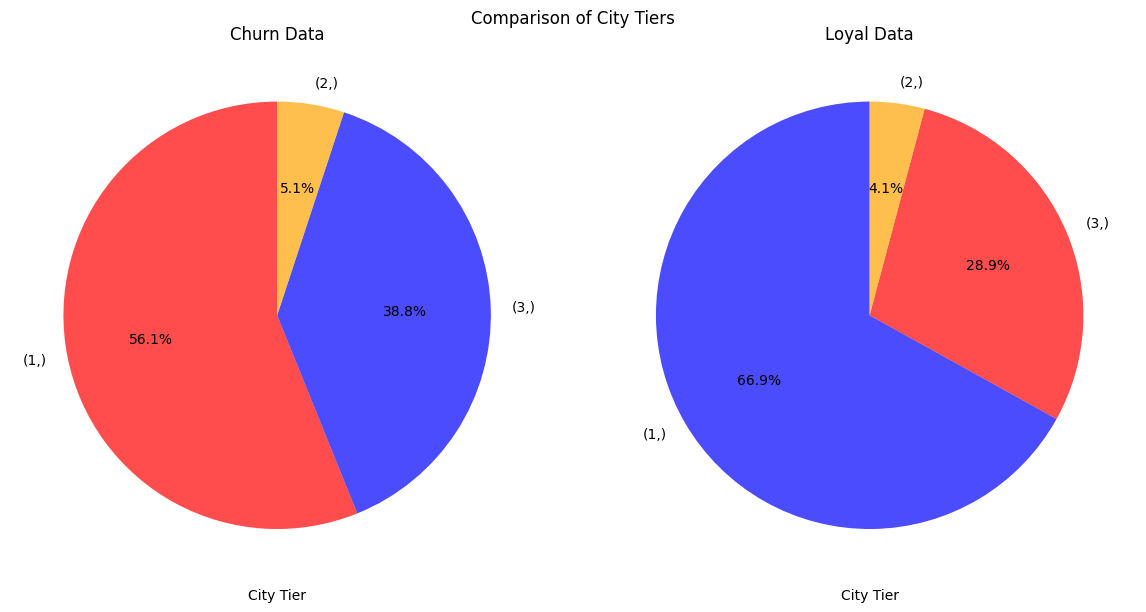

In [184]:
churn_city_data = data.loc[data['Churn'] == 1, ['CityTier']].value_counts()
loyal_city_data = data.loc[data['Churn'] == 0, ['CityTier']].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.pie(churn_city_data, labels=churn_city_data.index, colors=['red', 'blue', 'orange'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax1.set_title('Churn Data')
ax1.set_xlabel('City Tier')

# Plot the second histogram on the second subplot (ax2)
ax2.pie(loyal_city_data, labels=loyal_city_data.index, colors=['blue', 'red', 'orange'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax2.set_title('Loyal Data')
ax2.set_xlabel('City Tier')

# Add labels and title
fig.suptitle('Comparison of City Tiers')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Gender

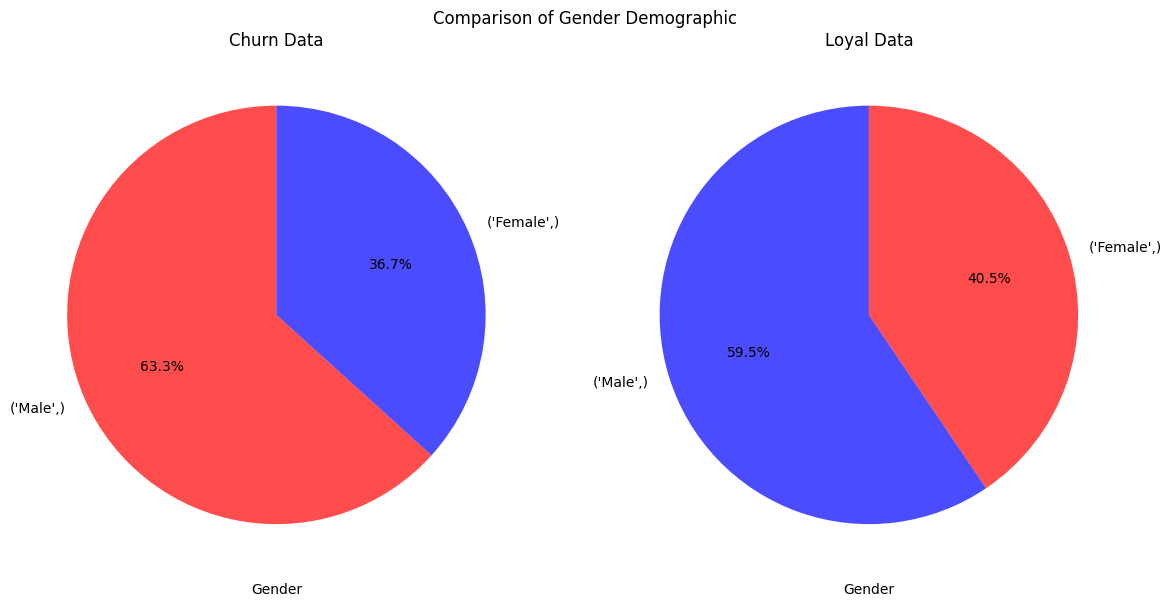

In [185]:
churn_cashback = data.loc[data['Churn'] == 1, ['Gender']].value_counts()
loyal_cashback = data.loc[data['Churn'] == 0, ['Gender']].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot (ax1)
ax1.pie(churn_cashback, labels=churn_cashback.index, colors=['red', 'blue'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax1.set_title('Churn Data')
ax1.set_xlabel('Gender')

# Plot the second histogram on the second subplot (ax2)
ax2.pie(loyal_cashback, labels=loyal_cashback.index, colors=['blue', 'red'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(alpha=0.7))
ax2.set_title('Loyal Data')
ax2.set_xlabel('Gender')

# Add labels and title
fig.suptitle('Comparison of Gender Demographic')

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

# Model Creation
***

In [40]:
y = data['Churn']
x = data.drop(['Churn'], axis=1)

In [41]:
x.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [45]:
cols = x_train
features = np.where(cols.dtypes != np.float64)[0]
train_pool = Pool(x_train, y_train, cat_features=features)
test_pool = Pool(x_test, y_test, cat_features=features)

In [46]:
model = CatBoostClassifier(eval_metric="AUC", learning_rate=0.03, iterations=1986)
model.fit(train_pool, eval_set=test_pool, verbose=500)
y_pred = model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
print("AUC is: ",auc)

0:	test: 0.8520973	best: 0.8520973 (0)	total: 13.3ms	remaining: 26.5s
500:	test: 0.9669041	best: 0.9669041 (500)	total: 3.49s	remaining: 10.3s
1000:	test: 0.9773247	best: 0.9773247 (1000)	total: 7.12s	remaining: 7s
1500:	test: 0.9833097	best: 0.9833097 (1500)	total: 10.7s	remaining: 3.46s
1985:	test: 0.9872625	best: 0.9872625 (1985)	total: 14.1s	remaining: 0us

bestTest = 0.9872625006
bestIteration = 1985

AUC is:  0.9872625005855286


Started out with 2000 iterations, was recommended 1986 iterations afterwards.